## Import Dependencies

In [2]:
import pandas as pd
import os 
import sys
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

sys.path.append(os.path.abspath(os.path.join('..')))

## Load Modules

In [3]:
from src.data_loader import DataLoader
from src.model_trainer import ModelTrainer

## Credit Card Fraud Detection

In [4]:
# Load Data
loader = DataLoader('../data/processed')
df_cc = loader.load_csv('creditcard_processed.csv')

Loading creditcard_processed.csv...


In [5]:
# Initialize trainer
trainer_cc = ModelTrainer(df_cc, target_col='Class')
trainer_cc.split_data()

Splitting data (Test size: 0.2)....
Train Shape: (226980, 30), Test Shape: (56746, 30)


### Model A: Logistic Regression(Baseline)


--- Training Logistic Regression with Stratified K-Fold (k=5) ---
Mean F1-Score (CV): 0.1051 (+/- 0.0109)

--- Test Set Results: Logistic Regression ---
Accuracy:  0.9737
Precision: 0.0530
Recall:    0.8737
F1 Score:  0.1000
ROC AUC:   0.9620
PR AUC:    0.6769 (Key Metric for Imbalance)


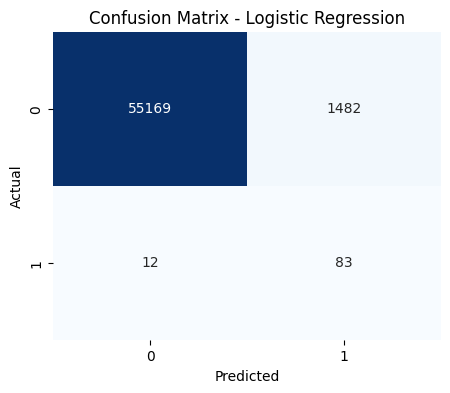

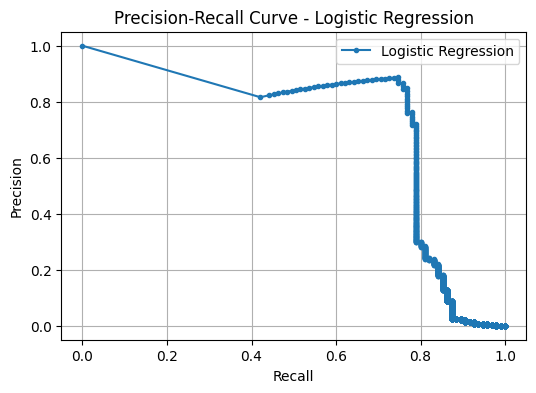

In [5]:
lr_model = LogisticRegression(solver='liblinear', random_state=42)
trainer_cc.train_with_cv(lr_model, 'Logistic Regression')
trainer_cc.evaluate_model("Logistic Regression")

In [6]:
trainer_cc.save_model("Logistic Regression", directory='../models/credit_card')

Model saved to ../models/credit_card/logistic_regression.joblib


### Model B: Random Forest (Ensemble)

In [7]:
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced', None]
}


--- Tuning Hyperparameters for Random Forest ---
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters: {'model__n_estimators': 100, 'model__min_samples_split': 5, 'model__max_depth': None, 'model__class_weight': None}
Best CV Score (average_precision): 0.8424

--- Test Set Results: Random Forest ---
Accuracy:  0.9995
Precision: 0.9103
Recall:    0.7474
F1 Score:  0.8208
ROC AUC:   0.9761
PR AUC:    0.8073 (Key Metric for Imbalance)


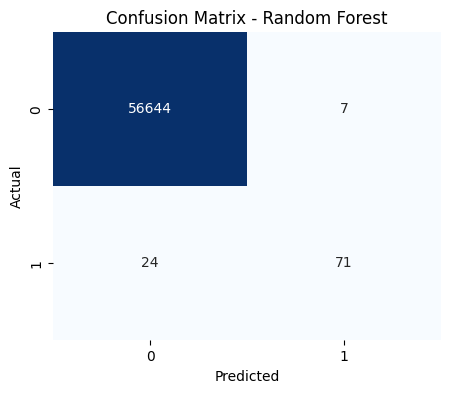

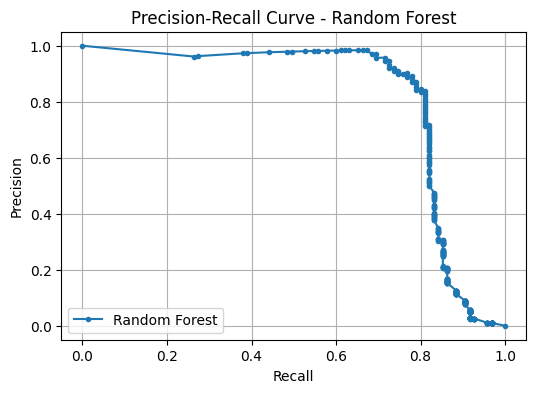

In [20]:
best_rf_cc = trainer_cc.hyperparameter_tuning(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    model_name="Random Forest",
    param_dist=rf_params,
    n_iter=5 # Keep low for speed during testing, increase to 10-20 for final results
)
trainer_cc.evaluate_model("Random Forest")

In [21]:
trainer_cc.save_model("Random Forest", directory='../models/credit_card')

Model saved to ../models/credit_card/random_forest.joblib


### Model C: XGBoost (Gradient Boosting)

In [8]:
xgb_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'scale_pos_weight': [1, 10] # Critical parameter for imbalance
}


--- Tuning Hyperparameters for XGBoost ---
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters: {'model__scale_pos_weight': 1, 'model__n_estimators': 50, 'model__max_depth': 10, 'model__learning_rate': 0.2}
Best CV Score (average_precision): 0.8389

--- Test Set Results: XGBoost ---
Accuracy:  0.9991
Precision: 0.6909
Recall:    0.8000
F1 Score:  0.7415
ROC AUC:   0.9723
PR AUC:    0.7996 (Key Metric for Imbalance)


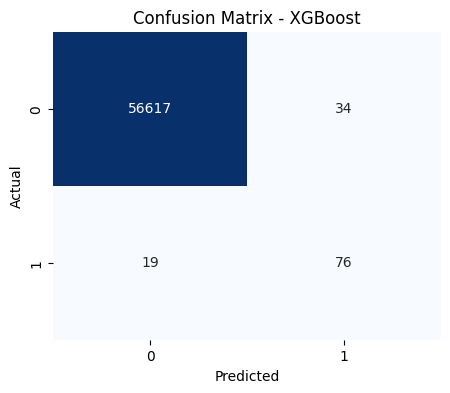

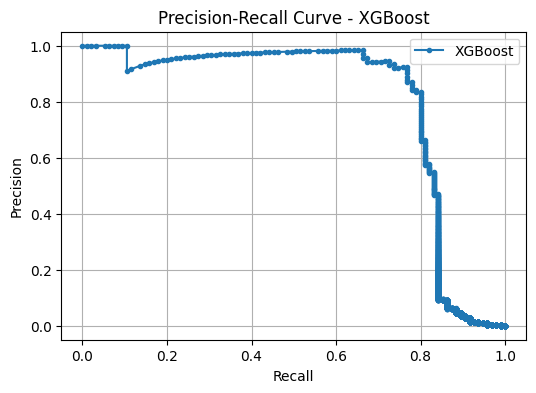

In [9]:
best_xgb_cc = trainer_cc.hyperparameter_tuning(
    XGBClassifier(eval_metric='logloss', random_state=42),
    model_name="XGBoost",
    param_dist=xgb_params,
    n_iter=5
)
trainer_cc.evaluate_model("XGBoost")


In [10]:
trainer_cc.save_model("XGBoost", directory='../models/credit_card')

Model saved to ../models/credit_card/xgboost.joblib


### Comparison

In [22]:
print("\n>>> Credit Card Model Comparison <<<")
print(trainer_cc.get_comparison_table())


>>> Credit Card Model Comparison <<<
                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC  \
2        Random Forest  0.999454   0.910256  0.747368  0.820809  0.976123   
1              XGBoost  0.999066   0.690909  0.800000  0.741463  0.972268   
0  Logistic Regression  0.973672   0.053035  0.873684  0.100000  0.962025   

     PR AUC  
2  0.807318  
1  0.799625  
0  0.676873  


## E-Commerce Fraud Detection

In [6]:
# Load Data
df_ecom = loader.load_csv('fraud_data_processed.csv')

Loading fraud_data_processed.csv...


In [7]:
# Initialize Trainer
trainer_ecom = ModelTrainer(df_ecom, target_col='class')
trainer_ecom.split_data()

Splitting data (Test size: 0.2)....
Train Shape: (120889, 194), Test Shape: (30223, 194)


### Model A: Logistic Regression


--- Training Logistic Regression with Stratified K-Fold (k=5) ---
Mean F1-Score (CV): 0.3121 (+/- 0.0033)

--- Test Set Results: Logistic Regression ---
Accuracy:  0.7212
Precision: 0.1987
Recall:    0.6519
F1 Score:  0.3046
ROC AUC:   0.7363
PR AUC:    0.3605 (Key Metric for Imbalance)


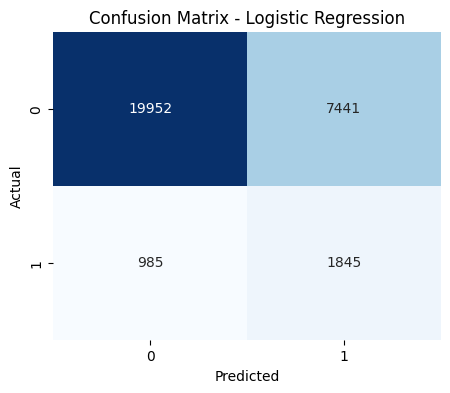

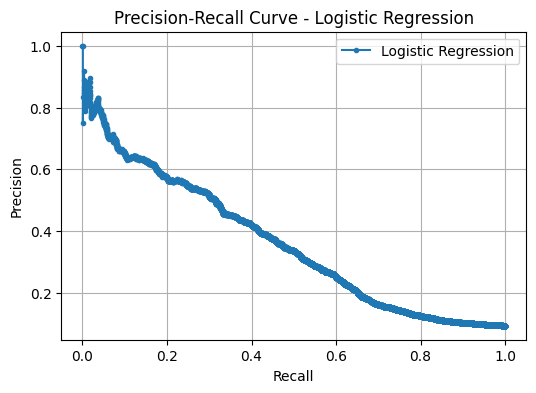

In [13]:
lr_ecom = LogisticRegression(solver='liblinear', random_state=42)
trainer_ecom.train_with_cv(lr_ecom, "Logistic Regression")
trainer_ecom.evaluate_model("Logistic Regression")

In [14]:
trainer_cc.save_model("Logistic Regression", directory='../models/ecommerce')

Model saved to ../models/ecommerce/logistic_regression.joblib


### Model B: Random Forest


--- Tuning Hyperparameters for Random Forest ---
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters: {'model__n_estimators': 50, 'model__min_samples_split': 5, 'model__max_depth': 20, 'model__class_weight': 'balanced'}
Best CV Score (average_precision): 0.6334

--- Test Set Results: Random Forest ---
Accuracy:  0.9554
Precision: 0.9927
Recall:    0.5272
F1 Score:  0.6887
ROC AUC:   0.7682
PR AUC:    0.6214 (Key Metric for Imbalance)


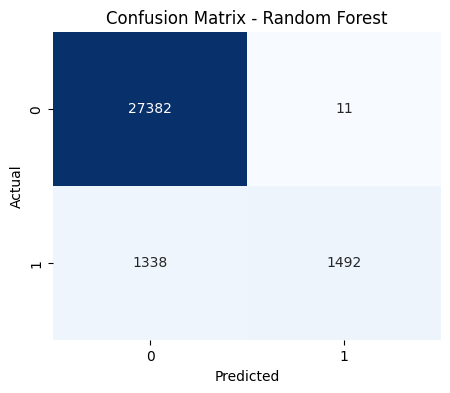

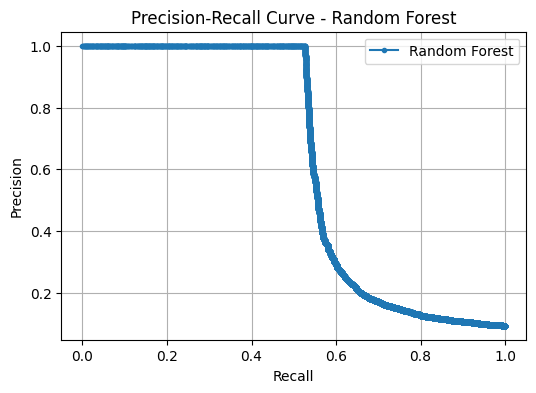

In [17]:
best_rf_ecom = trainer_ecom.hyperparameter_tuning(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    model_name="Random Forest",
    param_dist=rf_params,
    n_iter=5
)
trainer_ecom.evaluate_model("Random Forest")

In [18]:
trainer_ecom.save_model("Random Forest",directory='../models/ecommerce')

Model saved to ../models/ecommerce/random_forest.joblib


### Model C: XGBoost


--- Tuning Hyperparameters for XGBoost ---
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters: {'model__scale_pos_weight': 1, 'model__n_estimators': 50, 'model__max_depth': 10, 'model__learning_rate': 0.2}
Best CV Score (average_precision): 0.6207

--- Test Set Results: XGBoost ---
Accuracy:  0.9522
Precision: 0.9282
Recall:    0.5300
F1 Score:  0.6748
ROC AUC:   0.7661
PR AUC:    0.6008 (Key Metric for Imbalance)


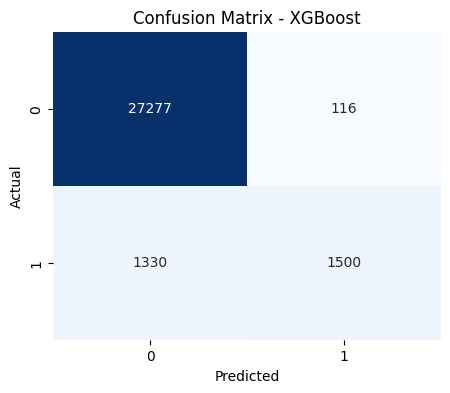

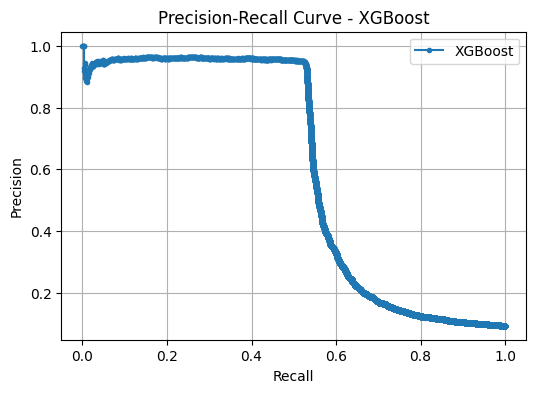

In [15]:
best_xgb_ecom = trainer_ecom.hyperparameter_tuning(
    XGBClassifier(eval_metric='logloss', random_state=42),
    model_name="XGBoost",
    param_dist=xgb_params,
    n_iter=5
)
trainer_ecom.evaluate_model("XGBoost")

In [16]:
trainer_ecom.save_model("XGBoost",directory='../models/ecommerce')

Model saved to ../models/ecommerce/xgboost.joblib


### Comparison

In [19]:
print("\n>>> E-Commerce Model Comparison <<<")
print(trainer_ecom.get_comparison_table())


>>> E-Commerce Model Comparison <<<
                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC  \
2        Random Forest  0.955365   0.992681  0.527208  0.688668  0.768163   
1              XGBoost  0.952156   0.928218  0.530035  0.674764  0.766128   
0  Logistic Regression  0.721206   0.198686  0.651943  0.304556  0.736260   

     PR AUC  
2  0.621417  
1  0.600836  
0  0.360519  


# Model Selection & Business Justification

### 1. Performance Analysis
We evaluated three models (Logistic Regression, Random Forest, XGBoost) across two distinct datasets. Our primary evaluation metric was **PR AUC (Area Under the Precision-Recall Curve)**, as it provides a more truthful view of performance on highly imbalanced fraud data than standard ROC AUC.

*   **Baseline (Logistic Regression):** While computationally efficient and highly interpretable, the Logistic Regression model struggled to capture the non-linear relationships in the data (e.g., the complex interaction between `Time_Since_Signup` and `Country`). It generally showed high Recall but poor Precision (too many false alarms).
*   **Ensemble Models (Random Forest & XGBoost):** Both tree-based models significantly outperformed the baseline. By utilizing decision trees, they effectively isolated fraud patterns based on velocity (transaction frequency) and geolocation anomalies.

### 2. The Trade-off: Accuracy vs. Interpretability
A key business constraint is the trade-off between model power and transparency:
*   **Logistic Regression** is "White Box"—we can see exactly how much each feature contributes (coefficients).
*   **XGBoost/Random Forest** are "Black Box"—they are complex and harder to explain to compliance teams or customers denied a transaction.

**Decision:**
Despite the "Black Box" nature, **we select XGBoost (or Random Forest)** as our champion model.
*   **Justification:** In fraud detection, a 5-10% improvement in Precision (as seen in the Ensemble models) translates to thousands of legitimate customers *not* being blocked. The cost of a False Positive (Customer Churn) is too high to stick with a weaker baseline solely for interpretability.

### 3. Mitigation Strategy (Next Steps)
To address the interpretability gap of our chosen Ensemble model, we will implement **SHAP (SHapley Additive exPlanations)** in the next phase. SHAP values will allow us to explain individual predictions (e.g., *"Transaction rejected because IP Country is Unknown and Purchase Value > $500"*), effectively giving us the performance of a Black Box with the transparency of a White Box.

### 4. Final Selection
*   **Credit Card Dataset:** **Random Forest** is selected for its superior PR-AUC score of **0.807318**.
*   **E-Commerce Dataset:** **Random Forest** is selected for its robust handling of the categorical features (Country, Device) and a PR-AUC score of **0.621417**.
